<a href="https://colab.research.google.com/github/gskumlehn/autism-info-llm-comparison/blob/main/count.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
!git clone https://github.com/gskumlehn/autism-info-llm-comparison.git

fatal: destination path 'autism-info-llm-comparison' already exists and is not an empty directory.


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("autism-info-llm-comparison/data.csv")
answers = df.iloc[:, 1:]


In [47]:
def word_count(text):
    return len(text.split())

word_count_df = answers.map(word_count)
word_count_df["Média"] = word_count_df.mean(axis=1)

print(word_count_df)

   OMS  ChatGPT 4.0  ChatGPT Vision  ScholarGPT  Gemini  Llama3  \
0   51           35              46          60      37      38   
1   97          102              67         152      37      37   
2   44           89              59         126     252      36   
3   49          120             116         163     210      45   
4  124          101             123         189     171      59   
5  180          167             177         222     310      71   
6  176          216             266         294     153      66   
7   54          222             266         263     102      63   

   Bing AI (Copilot)  Google Palm  Claude  ReKa Core  Solar Mini       Média  
0                 60           61      80        106          54   57.090909  
1                157          110     116        255         197  120.636364  
2                137           74      97        192          61  106.090909  
3                 81          235     148        317          84  142.545455  
4

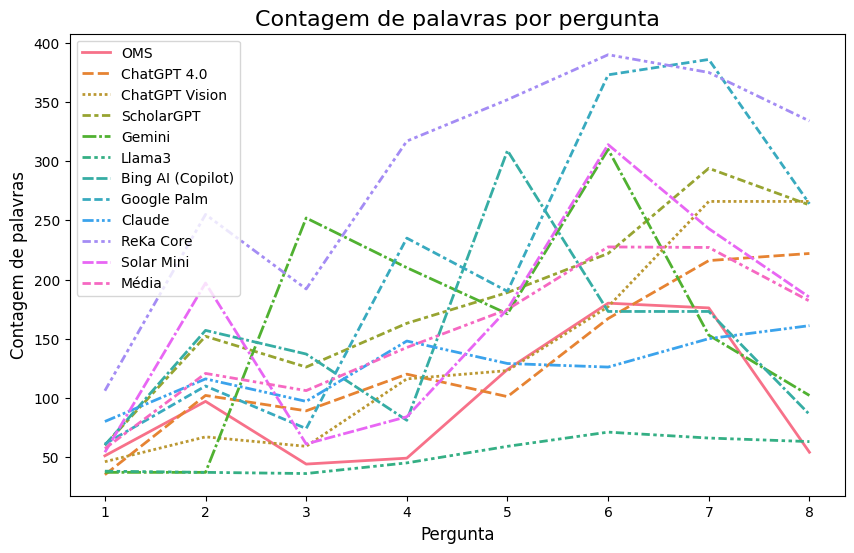

In [48]:
plt.figure(figsize=(10, 6))

sns.set_palette("crest")
sns.lineplot(data=word_count_df, linewidth=2)

plt.title("Contagem de palavras por pergunta", fontsize=16)
plt.xlabel("Pergunta", fontsize=12)
plt.ylabel("Contagem de palavras", fontsize=12)
plt.xticks(ticks=range(8), labels=[str(i+1) for i in range(8)])

plt.show()

In [49]:
means = word_count_df.mean()
print(means)

OMS                   96.875000
ChatGPT 4.0          131.500000
ChatGPT Vision       140.000000
ScholarGPT           183.625000
Gemini               159.000000
Llama3                51.875000
Bing AI (Copilot)    147.000000
Google Palm          211.625000
Claude               125.875000
ReKa Core            290.125000
Solar Mini           164.125000
Média                154.693182
dtype: float64


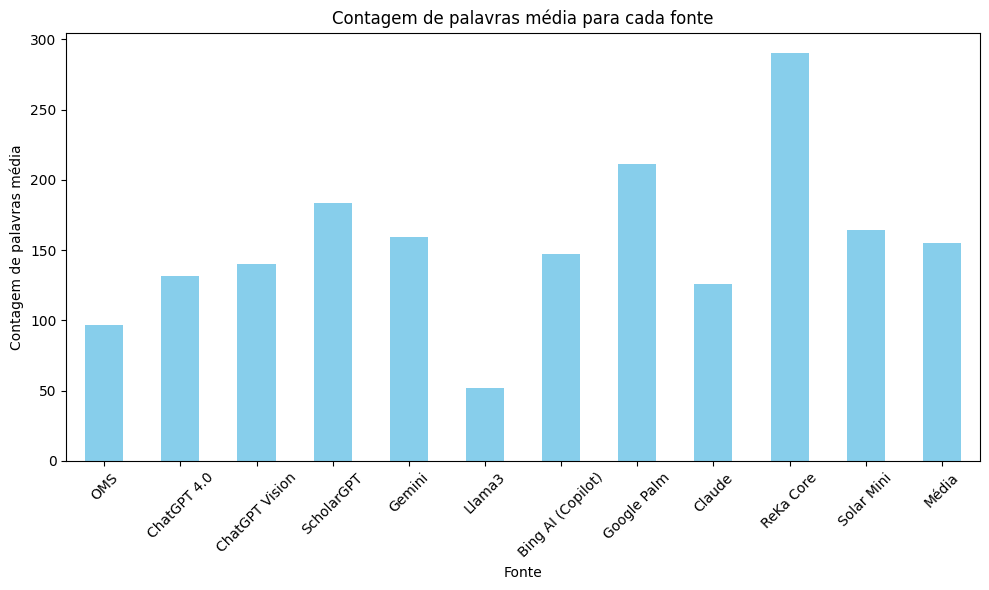

In [50]:
plt.figure(figsize=(10, 6))
means.plot(kind='bar', color='skyblue')
plt.title('Contagem de palavras média para cada fonte')
plt.xlabel('Fonte')
plt.ylabel('Contagem de palavras média')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

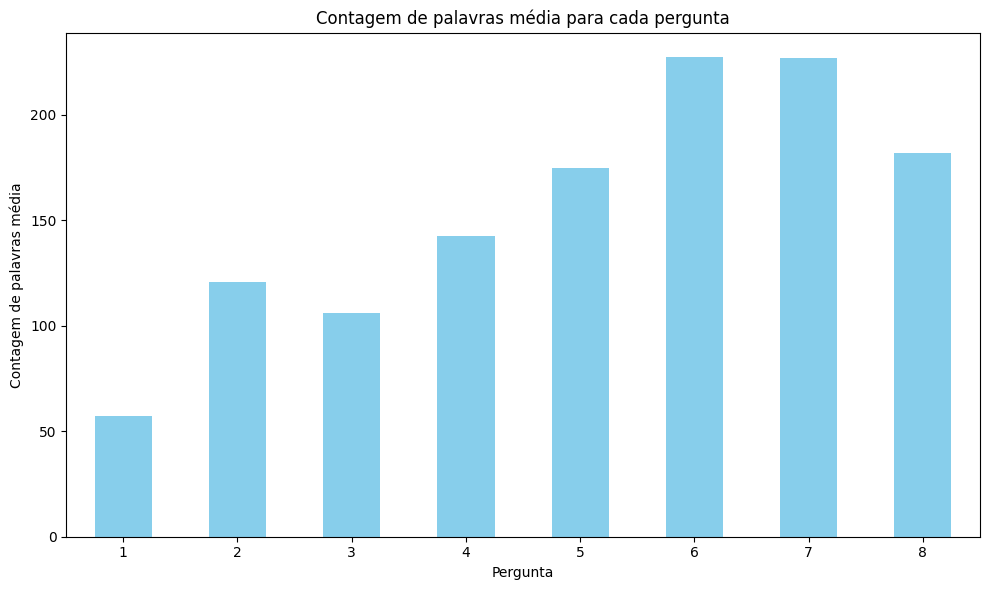

In [51]:
plt.figure(figsize=(10, 6))
word_count_df["Média"].plot(kind='bar', color='skyblue')
plt.title('Contagem de palavras média para cada pergunta')
plt.xlabel('Pergunta')
plt.ylabel('Contagem de palavras média')
plt.xticks(ticks=range(8), labels=[str(i+1) for i in range(8)], rotation=0)
plt.tight_layout()
plt.show()

In [52]:
word_count_df.loc['Total'] = word_count_df.sum(numeric_only=True)
word_count_df.to_csv('word_count.csv', index=False)

In [53]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

def token_count(text):
    return len(word_tokenize(text))

token_count_df = answers.map(token_count)
token_count_df["Média"] = token_count_df.mean(axis=1)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


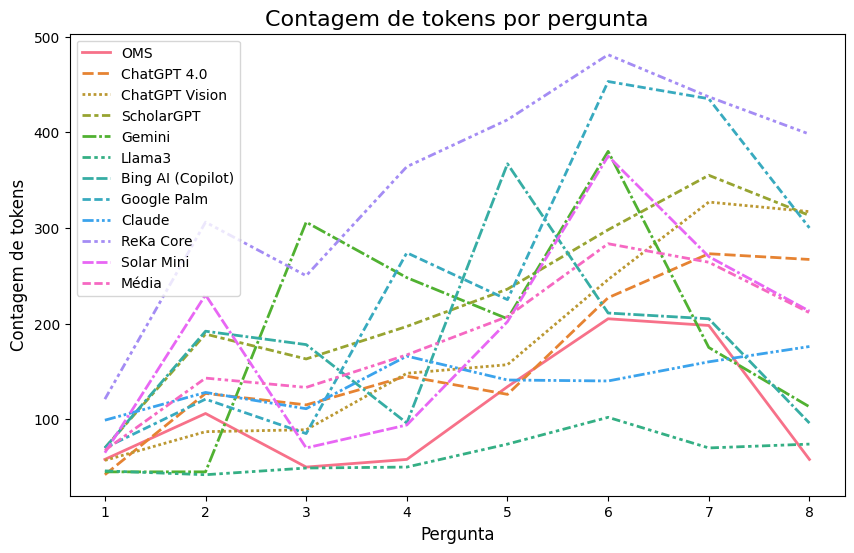

In [54]:
plt.figure(figsize=(10, 6))

sns.set_palette("crest")
sns.lineplot(data=token_count_df, linewidth=2)

plt.title("Contagem de tokens por pergunta", fontsize=16)
plt.xlabel("Pergunta", fontsize=12)
plt.ylabel("Contagem de tokens", fontsize=12)
plt.xticks(ticks=range(8), labels=[str(i+1) for i in range(8)])

plt.show()

In [55]:
tokens_mean = token_count_df.mean()
print(tokens_mean)

OMS                  108.375000
ChatGPT 4.0          165.250000
ChatGPT Vision       178.500000
ScholarGPT           227.625000
Gemini               189.625000
Llama3                63.375000
Bing AI (Copilot)    176.875000
Google Palm          245.375000
Claude               140.125000
ReKa Core            346.250000
Solar Mini           189.875000
Média                184.659091
dtype: float64


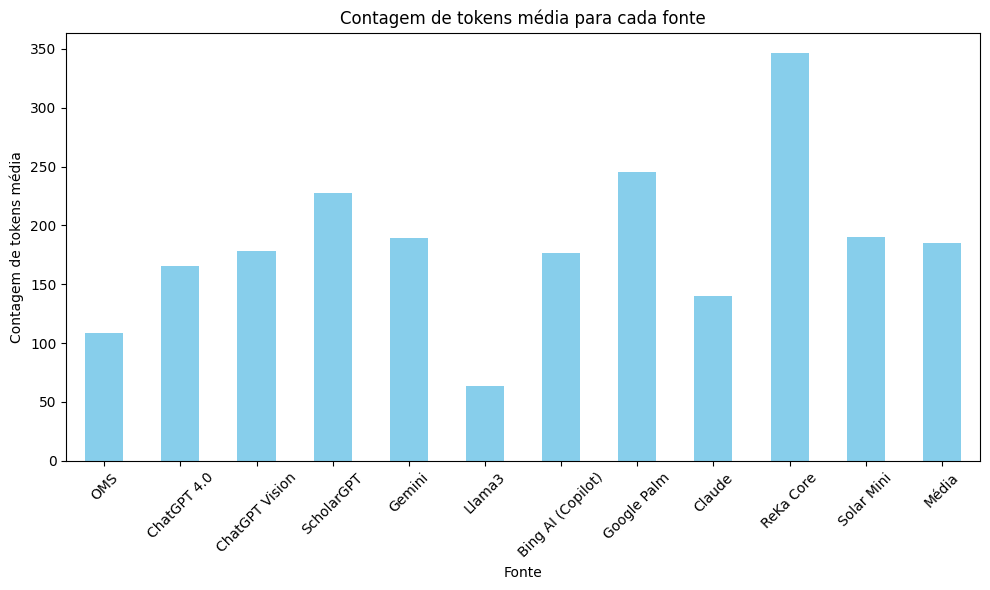

In [56]:
plt.figure(figsize=(10, 6))
tokens_mean.plot(kind='bar', color='skyblue')
plt.title('Contagem de tokens média para cada fonte')
plt.xlabel('Fonte')
plt.ylabel('Contagem de tokens média')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

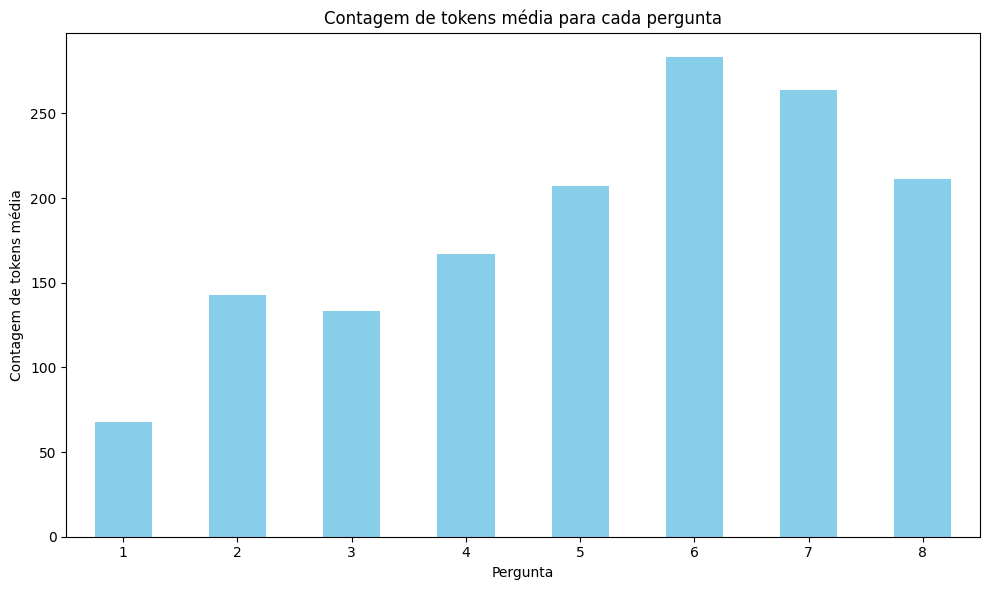

In [57]:
plt.figure(figsize=(10, 6))
token_count_df["Média"].plot(kind='bar', color='skyblue')
plt.title('Contagem de tokens média para cada pergunta')
plt.xlabel('Pergunta')
plt.ylabel('Contagem de tokens média')
plt.xticks(ticks=range(8), labels=[str(i+1) for i in range(8)], rotation=0)
plt.tight_layout()
plt.show()

In [58]:
token_count_df.loc['Total'] = token_count_df.sum(numeric_only=True)
token_count_df.to_csv('token_count.csv', index=False)